<a href="https://colab.research.google.com/github/dipanshuhaldar/AlexNet_implementation_Keras/blob/master/alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Implementation of AlexNet in Keras with Cats and Dogs dataset

**This code implementation is in line with** the design by *Alex Krizhevsky* and *Ilya Sutskever* 

In [0]:
#Import all dependencies
import keras
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/AlexNet')

In [0]:
#Generate Training Data
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory = 'training_set/training_set', target_size = (227, 227))

tstdata = ImageDataGenerator()
testdata = tstdata.flow_from_directory(directory = 'test_set/test_set', target_size = (227, 227))

Found 8008 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


Model Building

In [0]:
alexnet = Sequential()

#1st Convolutional Layer
alexnet.add(Conv2D(filters = 96, input_shape = (227, 227, 3), kernel_size = (11, 11),
                 strides = (4, 4), padding = 'valid', activation = 'relu'))

#Max Pooling
alexnet.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

#2nd Convolutional Layer
alexnet.add(Conv2D(filters = 256, kernel_size = (5, 5), strides = (1, 1), padding = 'same',
                 activation = 'relu'))
#Max Pooling
alexnet.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

#3rd Convolutional Layer
alexnet.add(Conv2D(filters = 384, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))

#4th Convolutional Layer
alexnet.add(Conv2D(filters = 384, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))

#5th Convolutional Layer
alexnet.add(Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))

#Max Pooling
alexnet.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = 'valid'))

#Passing to a Fully Connected Layer
alexnet.add(Flatten())

#1st Fully Connected Layer
alexnet.add(Dense(units = 9216, activation = 'relu'))

#2nd Fully Connected Layer
alexnet.add(Dense(units = 4096, activation = 'relu'))

#3rd Fully Connected Layer
alexnet.add(Dense(units = 4096, activation = 'relu'))

#Output Layer
alexnet.add(Dense(units = 2, activation = 'softmax'))

Model Compilation

In [0]:
#Model Evaluation Metrics

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
from keras.optimizers import Adam

alexnet.compile(optimizer = Adam(lr = 0.001), loss = keras.losses.categorical_crossentropy,
                metrics = ['accuracy',f1_m, precision_m, recall_m])

Model Training

Epoch 1/10
10/10 [==============================] - 88s 9s/step - loss: 4835.6304 - accuracy: 0.4906 - f1_m: 0.4906 - precision_m: 0.4906 - recall_m: 0.4906 - val_loss: 0.7432 - val_accuracy: 0.4750 - val_f1_m: 0.4750 - val_precision_m: 0.4750 - val_recall_m: 0.4750
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,val_f1_m,val_precision_m,val_recall_m,loss,accuracy,f1_m,precision_m,recall_m
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10/10 [==============================] - 87s 9s/step - loss: 0.8613 - accuracy: 0.4906 - f1_m: 0.4906 - precision_m: 0.4906 - recall_m: 0.4906 - val_loss: 0.6863 - val_accuracy: 0.5312 - val_f1_m: 0.5312 - val_precision_m: 0.5312 - val_recall_m: 0.5312
Epoch 3/10
10/10 [==============================] - 77s 8s/step - loss: 0.8325 - accuracy: 0.5338 - f1_m: 0.5406 - precision_m: 0.5406 - recall_m: 0.5406 - val_loss: 1.2994 - val_accuracy: 0.4938 - val_f1_m: 0.4937 - val_precision_m: 0.4938 - val_recall_m: 0.4938
Epoch 4/10
10/10 [==============================] - 85s 9s/step - loss: 0.7524 - accuracy: 0.4812 - f1_m: 0.4812 - precision_m: 0.4812 - recall_m: 0.4812 - val_loss: 0.6853 - val_accuracy: 0.5375 - val_f1_m: 0.5375 - val_precision_m: 0.5375 - val_recall_m: 0.5375
Epoch 5/10
10/10 [==============================] - 85s 8s/step - loss: 0.7027 - accuracy: 0.5406 - f1_m: 0.5406 - precision_m: 0.5406 - recall_m: 0.5406 - val_loss: 0.6905 - val_accuracy: 0.5031 - val_f1_m: 0.5031 - va

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 152 could not be retrieved. It could be because a worker has died.
  UserWarning)


10/10 [==============================] - 110s 11s/step - loss: 0.7031 - accuracy: 0.4719 - f1_m: 0.4719 - precision_m: 0.4719 - recall_m: 0.4719 - val_loss: 0.6908 - val_accuracy: 0.4750 - val_f1_m: 0.4750 - val_precision_m: 0.4750 - val_recall_m: 0.4750
Epoch 7/10
10/10 [==============================] - 84s 8s/step - loss: 0.6940 - accuracy: 0.5031 - f1_m: 0.5031 - precision_m: 0.5031 - recall_m: 0.5031 - val_loss: 0.6938 - val_accuracy: 0.5322 - val_f1_m: 0.5353 - val_precision_m: 0.5353 - val_recall_m: 0.5353
Epoch 8/10
10/10 [==============================] - 86s 9s/step - loss: 0.6930 - accuracy: 0.5188 - f1_m: 0.5187 - precision_m: 0.5188 - recall_m: 0.5188 - val_loss: 0.6960 - val_accuracy: 0.5156 - val_f1_m: 0.5156 - val_precision_m: 0.5156 - val_recall_m: 0.5156
Epoch 9/10
10/10 [==============================] - 81s 8s/step - loss: 0.6928 - accuracy: 0.5125 - f1_m: 0.5125 - precision_m: 0.5125 - recall_m: 0.5125 - val_loss: 0.6886 - val_accuracy: 0.5469 - val_f1_m: 0.5469 - 

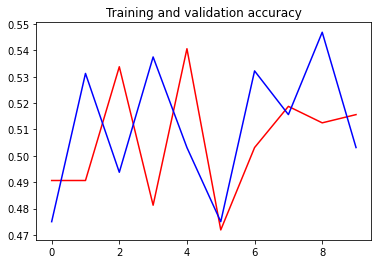

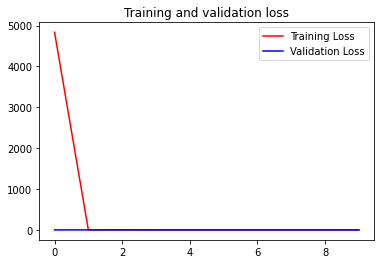

In [0]:
#Early Stopping
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('alexnet_1.h5', monitor = 'val_acc', verbose = 1, save_best_only = True,
                             save_weights_only = False, mode = 'auto', period = 1)

early_stopping_monitor = EarlyStopping(monitor = 'val_acc', min_delta = 0, patience = 20, verbose = 1,
                                       mode = 'auto')

#Train Model
history = alexnet.fit_generator(steps_per_epoch = 10, generator = traindata, validation_data= testdata,
                                validation_steps=10, epochs = 10, callbacks = [checkpoint, early_stopping_monitor])

#Accuracy and Loss change per epoch

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Make Predictions

In [0]:
#Evaluate the model
alexnet.predict_generator(generator = testdata)

array([[0.51027673, 0.48972324],
       [0.51027673, 0.48972324],
       [0.51027673, 0.48972324],
       ...,
       [0.51027673, 0.48972324],
       [0.51027673, 0.48972324],
       [0.51027673, 0.48972324]], dtype=float32)